![](https://i.imgur.com/sJ8atnZ.png)

![](https://i.imgur.com/j9XueUI.jpg)

# INDIA VISUALIZATION : NUMBER OF MOTOR VEHICLES STATEWISE

Here, we would like to visualize the Statewise number of motorvehicles per 1000 population in India from the year 2013-15.
The methodology to be followed is as follows: 




[1. Importing the libraries](#1. Importing the libraries)




[2. Reading the Data](#2. Reading the Data)




[3. Number of Motor vehicles per 1000 population during 2013-15 and 2014-15](#3. Number of Motor vehicles per 1000 population during 2013-15 and 2014-15)




[4. Visualization of NUMBER OF VEHICLES OF INDIAN STATES for the year 2013-2014](#4. Visualization of NUMBER OF VEHICLES OF INDIAN STATES for the year 2013-2014)

-  [Step 1 : Importing Basemap](#Step 1 : Importing Basemap)  

-  [Step 2 : Creating  a map and using shapefiles for drawing states](#Step 2 : Creating  a map and using shapefiles for drawing states)    

-  [Step 3 : Creating a dataframe mapping states to state name and number of vehicles](#Step 3 : Creating a dataframe mapping states to state name and number of vehicles) 

-  [Step 4 : Using data to color areas](#Step 4 : Using data to color areas)  
       
    
    
       
[5. Visualization of NUMBER OF VEHICLES OF INDIAN STATES for the year 2014-2015](#5. Visualization of NUMBER OF VEHICLES OF INDIAN STATES for the year 2014-2015)



[6. Visualization of CHANGE IN NUMBER OF VEHICLES OF INDIAN STATES for the year 2013-2015](#5. Visualization of CHANGE IN NUMBER OF VEHICLES OF INDIAN STATES for the year 2013-2015)

-  [Creating a separate column to denote the % change in  number of motor vehicles from 2013 - 15](#Creating a separate column to denote the % change in  number of motor vehicles from 2013 - 15)

-  [Storing the change percentages in a list having the state names and their corresponding % change in motor vehicles](#Storing the change percentages in a list having the state names and their corresponding % change in motor vehicles)

-  [Plotting the % changes in motor vehicles on a Basemap](#Plotting the % changes in motor vehicles on a Basemap)
       
      
       

<a id='Importing the libraries'></a>

# 1. Importing the libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.cm
%matplotlib inline

<a id='Reading the Data'></a>
# 2. Reading the Data

In [40]:
df = pd.read_csv("datafile.csv")
df.head()

,States/UTs,No. of Motor Vehicles/1000 population - During 2013-14,No. of Motor Vehicles/1000 population - During 2014-15
0,Andhra Pradesh,161,179
1,Arunachal Pradesh,117,116
2,Assam,70,78
3,Bihar,41,46
4,Chhattisgarh,153,168


Few of the state names contain '&' in their state names. We have to convert them into 'and', to make it as per the state names of the shapefile which we will be loading later.

In [70]:
df['States/UTs'] = df['States/UTs'].str.replace('&','and')


<a id='Number of Motor vehicles per 1000 population during 2013-15 and 2014-15'></a>
# 3. Number of Motor vehicles per 1000 population during 2013-15 and 2014-15

In [44]:
vehicle_1314 = []
vehicle_1415 = []
for i in range(len(df)):
    states = df.iloc[i,0]
    rate_1314 = df.iloc[i,1]
    rate_1415 = df.iloc[i,2]
    vehicle_1314.append((states,rate_1314))
    vehicle_1415.append((states,rate_1415))
    
print ("No. of Motor Vehicles per 1000 population - During 2013-14 - \n ",vehicle_1314)
print("\n No. of Motor Vehicles per 1000 population - During 2014-15 - \n ", vehicle_1415)

No. of Motor Vehicles per 1000 population - During 2013-14 - 
  [('Andhra Pradesh', 161), ('Arunachal Pradesh', 117), ('Assam', 70), ('Bihar', 41), ('Chhattisgarh', 153), ('Goa', 523), ('Gujarat', 278), ('Haryana', 270), ('Himachal Pradesh', 139), ('Jammu and Kashmir', 93), ('Jharkhand', 52), ('Karnataka', 217), ('Kerala', 248), ('Madhya Pradesh', 128), ('Maharashtra', 199), ('Manipur', 155), ('Meghalaya', 91), ('Mizoram', 132), ('Nagaland', 136), ('Odisha', 112), ('Punjab', 218), ('Rajasthan', 156), ('Sikkim', 62), ('Tamil Nadu', 303), ('Tripura', 68), ('Uttarakhand', 158), ('Uttar Pradesh', 90), ('West Bengal', 73), ('Andaman and Nicobar Islands', 174), ('Chandigarh', 376), ('Dadra and Nagar Haveli', 252), ('Daman and Diu', 308), ('Delhi', 409), ('Lakshadweep', 165)]

 No. of Motor Vehicles per 1000 population - During 2014-15 - 
  [('Andhra Pradesh', 179), ('Arunachal Pradesh', 116), ('Assam', 78), ('Bihar', 46), ('Chhattisgarh', 168), ('Goa', 551), ('Gujarat', 300), ('Haryana', 291

<a id='Visualization of NUMBER OF VEHICLES OF INDIAN STATES for the year 2013-2014'></a>
# 4. Visualization of NUMBER OF VEHICLES OF INDIAN STATES for the year 2013-2014

<a id='Step 1 : Importing Basemap'></a>
### Step 1 : Importing Basemap

In [45]:
from mpl_toolkits.basemap import Basemap

<a id='Step 2 : Creating  a map and using shapefiles for drawing states'></a>
### Step 2 : Creating  a map and using shapefiles for drawing states

(32,
 5,
 [68.35859, 6.733651, 0.0, 0.0],
 [97.46212, 37.03473, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x185a0762978>)

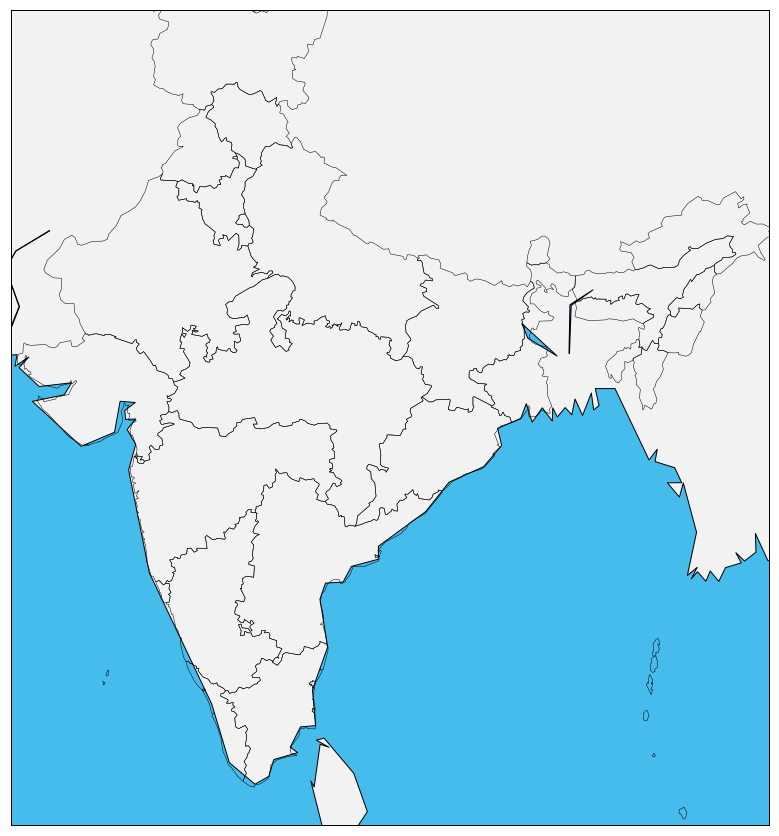

In [53]:
'''
STEP 2 : CREATING A MAP
'''
# Create figure 
fig, ax = plt.subplots()
# Create a map with the coordinates determined by the Bounding Box tool
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')
# Fill continents and lakes
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# Draw coast lines
m.drawcoastlines()

'''
USING SHAPEFILES FOR DRAWING STATES 
'''
# Load the shape file of India
m.readshapefile(
    "C:\\Data_Science\\Data_science\\Data Viz\\Project\\Uber Data\\Rider\\India Shapefile With Kashmir\\India Shape files\\India Shape\\india_st","INDIA")


<a id='Step 3 : Creating a dataframe mapping states to state name and number of vehicles'></a>
### Step 3 : Creating a dataframe mapping states to state name and number of vehicles

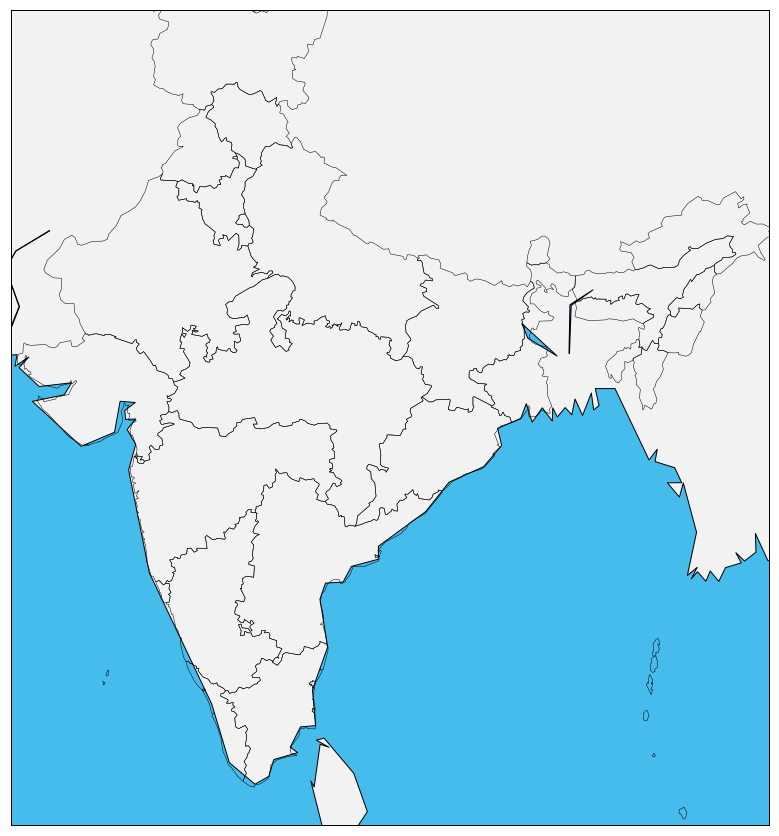

In [54]:
'''
STEP 2 : CREATING A MAP
'''
# Create figure 
fig, ax = plt.subplots()
# Create a map with the coordinates determined by the Bounding Box tool
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')
# Fill continents and lakes
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# Draw coast lines
m.drawcoastlines()

'''
USING SHAPEFILES FOR DRAWING STATES 
'''
# Load the shape file of India
m.readshapefile(
    "C:\\Data_Science\\Data_science\\Data Viz\\Project\\Uber Data\\Rider\\India Shapefile With Kashmir\\India Shape files\\India Shape\\india_st","INDIA")



# Create an empty list to hold number of vehicles in 2013-14
Num_of_vehicles_1314 = []

for state_info in m.INDIA_info:
    # Get the state in uppercase, as our csv file has state names in upper case
    state = state_info['STATE'].upper()
    # initialize number of vehicles = 0
    num = 0
    
    # In vehicle_1314 (containing tuples of state name and no. of vehicles), search for state 'state'
    # Append its corresponding number to Num_of_vehicles_1314
    for x in vehicle_1314:

        if x[0].upper() == state:
            num = x[1]
            break
    Num_of_vehicles_1314.append(num) 
    
    
# Create a dataframe containing shapes, state names and no. of vehicles   
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
        'area': [area['STATE'] for area in m.INDIA_info],
        'Num_of_vehicles_1314' : Num_of_vehicles_1314
    })


<a id='Step 4 : Using data to color areas'></a>
### Step 4 : Using data to color areas

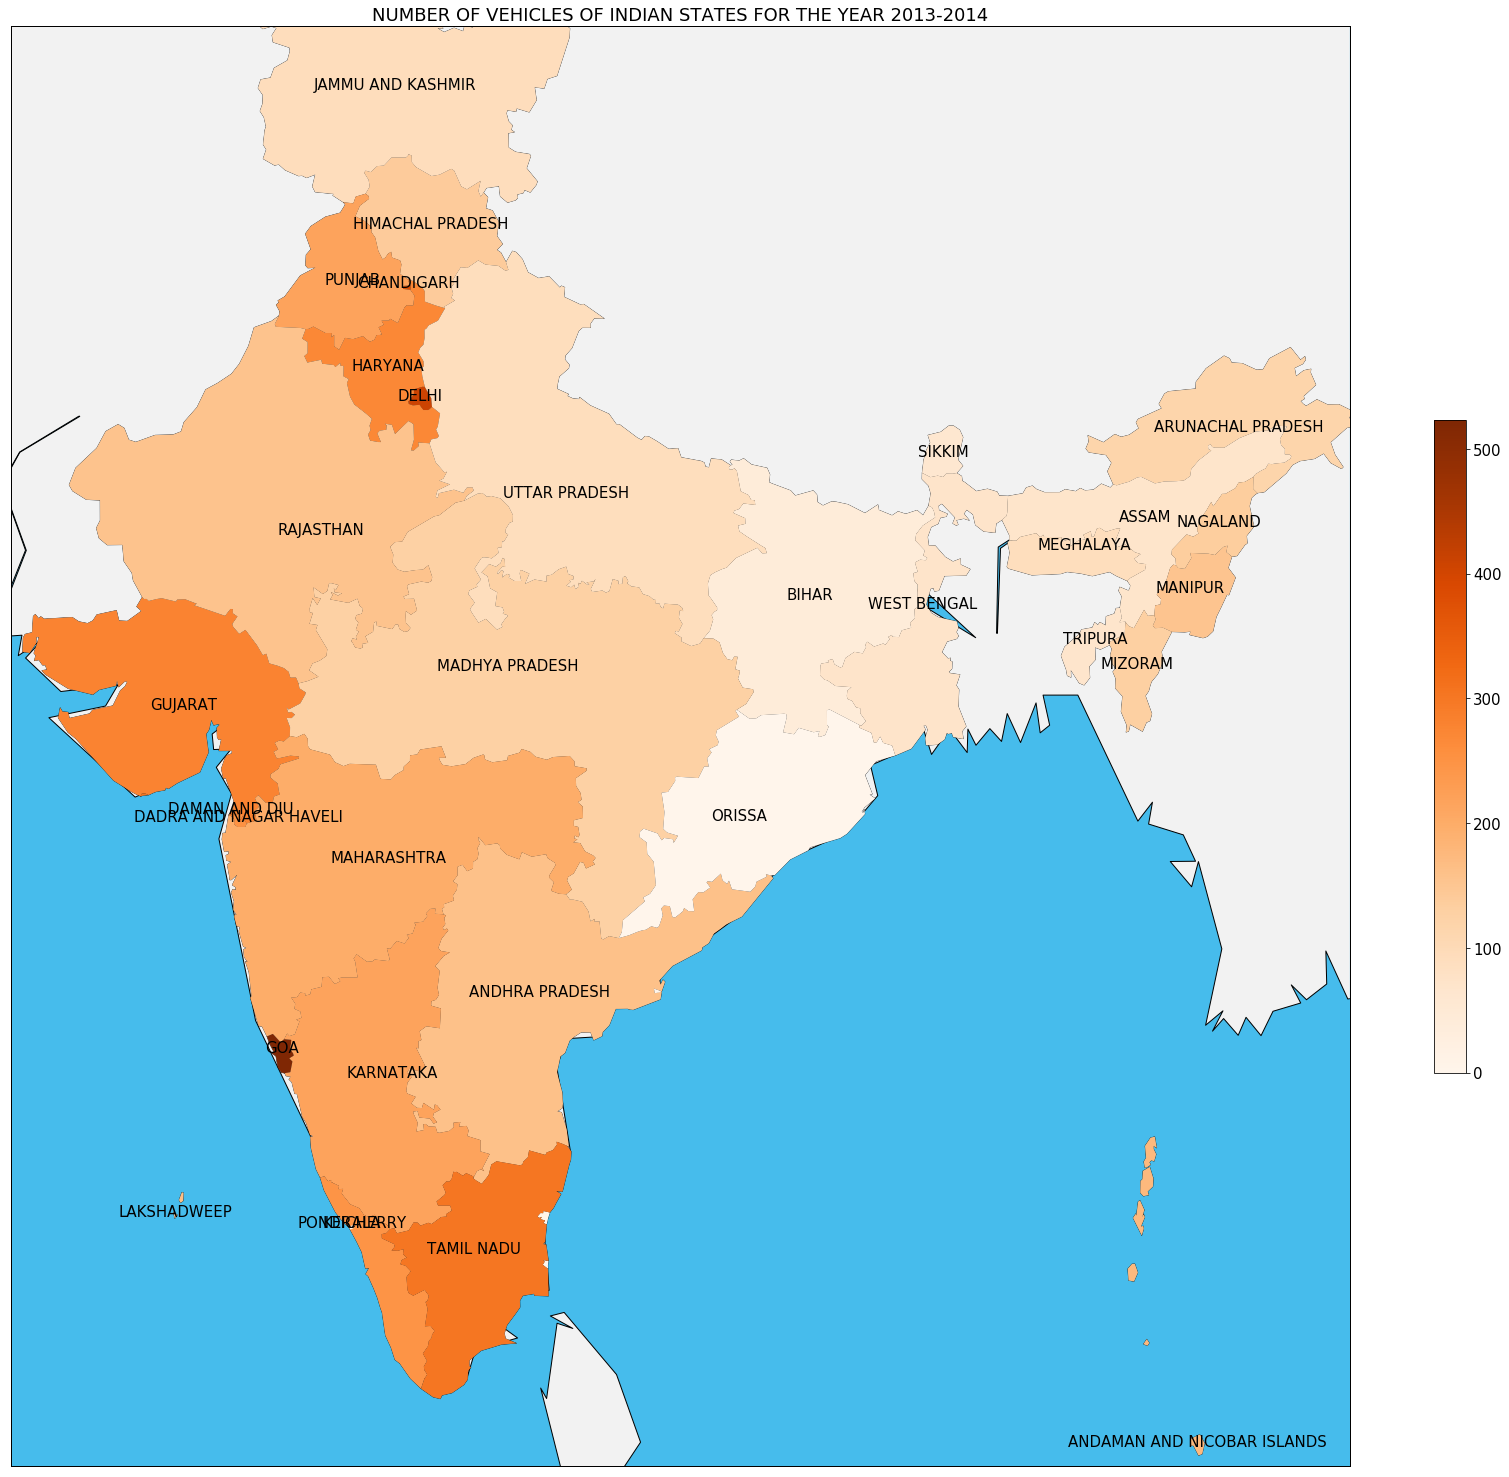

In [58]:
'''
STEP 2 : CREATING A MAP
'''
# Create figure 
fig, ax = plt.subplots()
# Create a map with the coordinates determined by the Bounding Box tool
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')
# Fill continents and lakes
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# Draw coast lines
m.drawcoastlines()

'''
USING SHAPEFILES FOR DRAWING STATES 
'''
# Load the shape file of India
m.readshapefile(
    "C:\\Data_Science\\Data_science\\Data Viz\\Project\\Uber Data\\Rider\\India Shapefile With Kashmir\\India Shape files\\India Shape\\india_st","INDIA")




# Create an empty list to hold number of vehicles in 2013-14
Num_of_vehicles_1314 = []

for state_info in m.INDIA_info:
    # Get the state in uppercase, as our csv file has state names in upper case
    state = state_info['STATE'].upper()
    # initialize number of vehicles = 0
    num = 0
    
    # In vehicle_1314 (containing tuples of state name and no. of vehicles), search for state 'state'
    # Append its corresponding number to Num_of_vehicles_1314
    for x in vehicle_1314:

        if x[0].upper() == state:
            num = x[1]
            break
    Num_of_vehicles_1314.append(num) 
    
    
# Create a dataframe containing shapes, state names and no. of vehicles   
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
        'area': [area['STATE'] for area in m.INDIA_info],
        'Num_of_vehicles_1314' : Num_of_vehicles_1314
    })
 
# Get all the shapes
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
# Create a colormap
cmap = plt.get_cmap('Oranges')   
# Create a patch collection. Create patches on the top of the map, not beneath it (zorder=2)
pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
# Set color according to the number of vehicle of the state
pc.set_facecolor(cmap(norm(df_poly['Num_of_vehicles_1314'].fillna(0).values)))
ax.add_collection(pc)

printed_names = []
for shapedict,state in zip(m.INDIA_info, m.INDIA):
    state_name = [value for key, value in shapedict.items()][0]
    
    if state_name in printed_names: continue
    # center of polygon
    x, y = np.array(state).mean(axis=0)
    # You have to align x,y manually to avoid overlapping for little states
    plt.text(x+.1, y, state_name, ha="center")
    printed_names += [state_name,] 


# Create a mapper to map color intensities to values
mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(Num_of_vehicles_1314)
plt.colorbar(mapper, shrink=0.4)
# Set title for the plot
ax.set_title("NUMBER OF VEHICLES OF INDIAN STATES FOR THE YEAR 2013-2014")
# Change plot size and font size
plt.rcParams['figure.figsize'] = (30,30)
plt.rcParams.update({'font.size': 10})
plt.show()

<a id='Visualization of NUMBER OF VEHICLES OF INDIAN STATES for the year 2014-2015'></a>
# 5. Visualization of NUMBER OF VEHICLES OF INDIAN STATES for the year 2014-2015

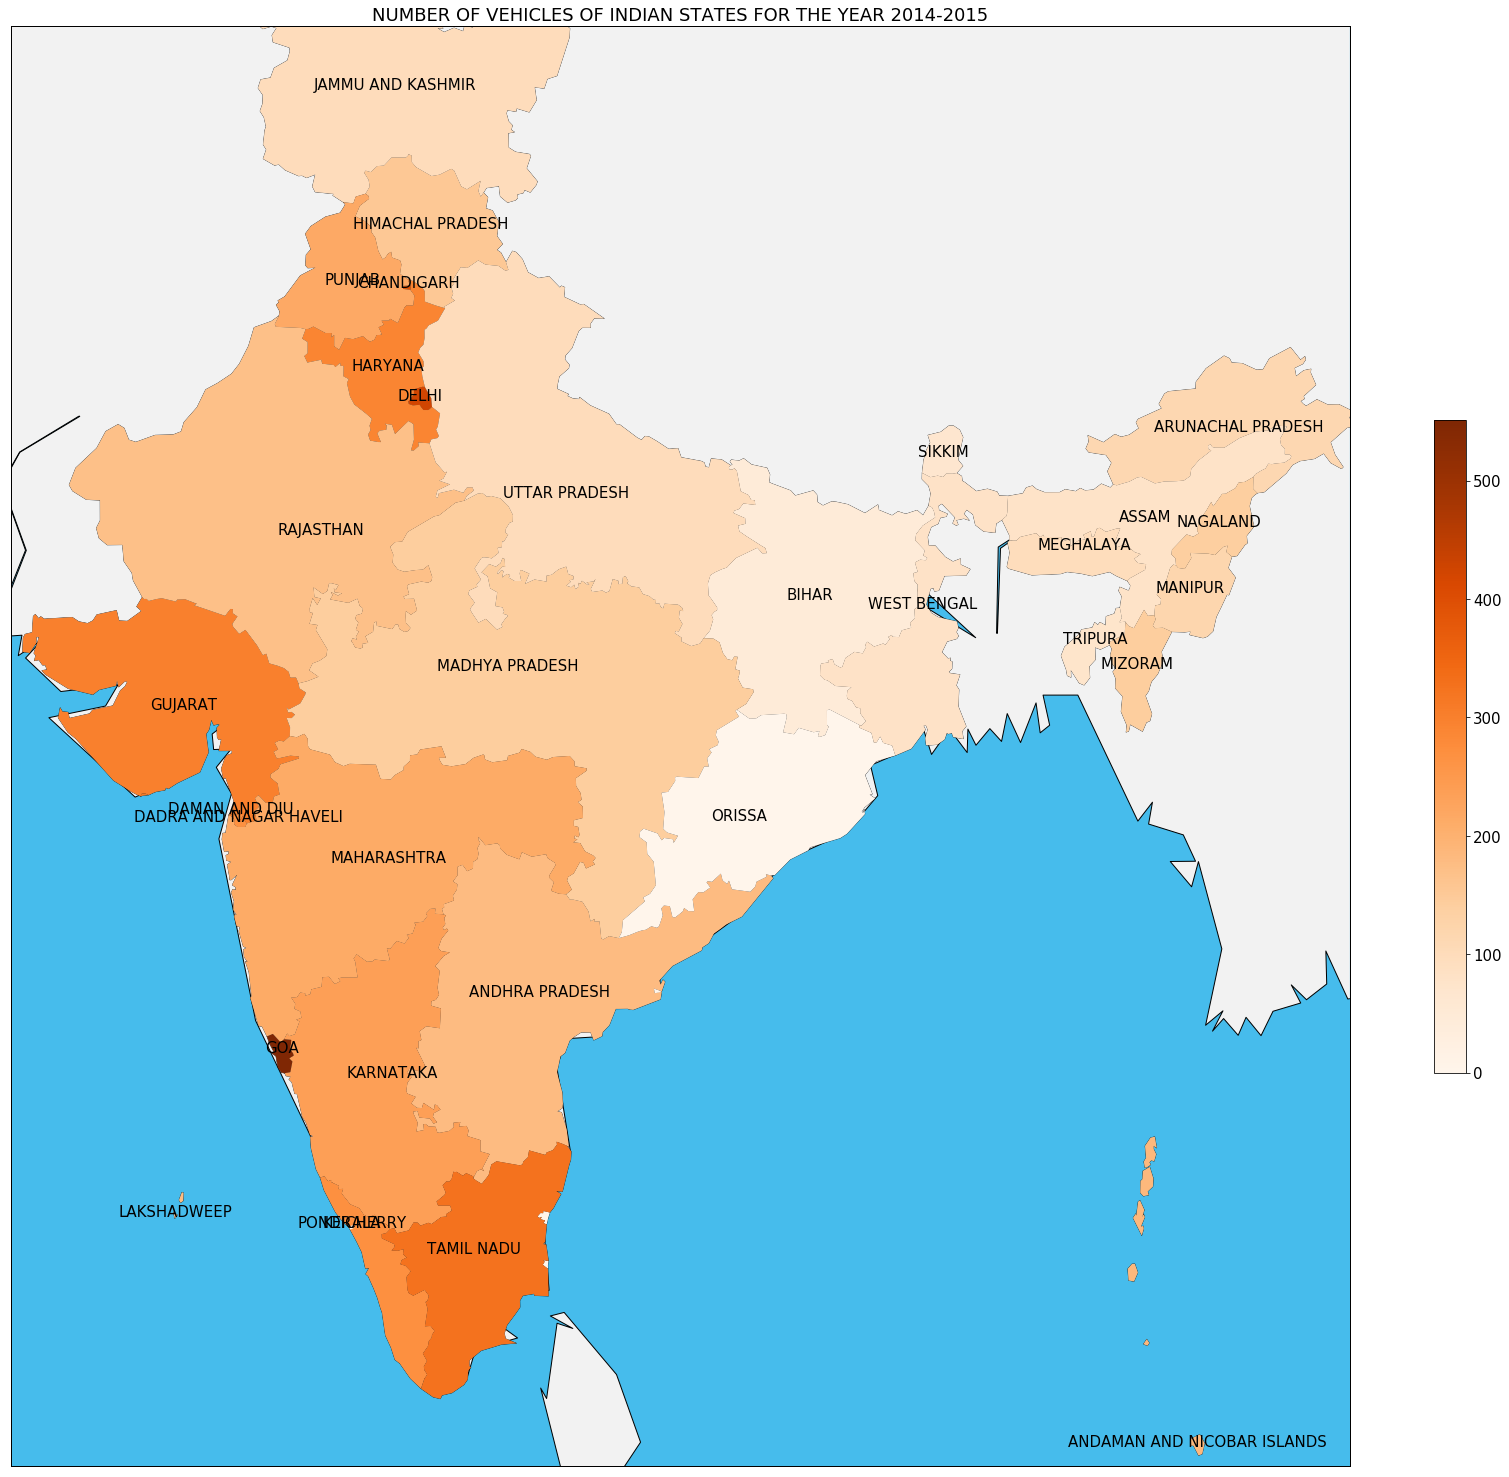

In [27]:
'''
STEP 2 : CREATING A MAP
'''
# Create figure 
fig, ax = plt.subplots()
# Create a map with the coordinates determined by the Bounding Box tool
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')
# Fill continents and lakes
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# Draw coast lines
m.drawcoastlines()

'''
STEP 3 : USING SHAPEFILES FOR DRAWING STATES 
'''
# Load the shape file of India
m.readshapefile(
    "C:\\Data_Science\\Data_science\\Data Viz\\Project\\Uber Data\\Rider\\India Shapefile With Kashmir\\India Shape files\\India Shape\\india_st","INDIA")


'''
STEP 4 : CREATING A DATAFRAME MAPPING SHAPES TO STATE NAME AND NUMBER OF VEHICLES
'''
# Create an empty list to hold number of vehicles in 2014-15
Num_of_vehicles_1415 = []

for state_info in m.INDIA_info:
    # Get the state in uppercase, as our csv file has state names in upper case
    state = state_info['STATE'].upper()
    # initialize number of vehicles = 0
    num = 0
    
    # In vehicle_1314 (containing tuples of state name and no. of vehicles), search for state 'state'
    # Append its corresponding number to Num_of_vehicles_1415
    for x in vehicle_1415:

        if x[0].upper() == state:
            num = x[1]
            break
    Num_of_vehicles_1415.append(num) 
    
# Create a dataframe containing shapes, state names and no. of vehicles   
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
        'area': [area['STATE'] for area in m.INDIA_info],
        'Num_of_vehicles_1415' : Num_of_vehicles_1415
    })

'''
STEP 5 : USING DATA TO COLOR AREAS
'''
# Get all the shapes
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
# Create a colormap
cmap = plt.get_cmap('Oranges')   
# Create a patch collection. Create patches on the top of the map, not beneath it (zorder=2)
pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
# Set color according to the number of vehicle of the state
pc.set_facecolor(cmap(norm(df_poly['Num_of_vehicles_1415'].fillna(0).values)))
ax.add_collection(pc)

printed_names = []
for shapedict,state in zip(m.INDIA_info, m.INDIA):
    state_name = [value for key, value in shapedict.items()][0]
    
    if state_name in printed_names: continue
    # center of polygon
    x, y = np.array(state).mean(axis=0)
    # You have to align x,y manually to avoid overlapping for little states
    plt.text(x+.1, y, state_name, ha="center")
    printed_names += [state_name,] 


# Create a mapper to map color intensities to values
mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(Num_of_vehicles_1415)
plt.colorbar(mapper, shrink=0.4)
# Set title for the plot
ax.set_title("NUMBER OF VEHICLES OF INDIAN STATES FOR THE YEAR 2014-2015")
# Change plot size and font size
plt.rcParams['figure.figsize'] = (30, 30)
plt.rcParams.update({'font.size': 15})
plt.show()

<a id='Visualization of CHANGE IN NUMBER OF VEHICLES OF INDIAN STATES for the year 2013-2015'></a>
# 6. Visualization of CHANGE IN NUMBER OF VEHICLES OF INDIAN STATES for the year 2013-2015

<a id='Creating a separate column to denote the % change in  number of motor vehicles from 2013 - 15'></a>
### Creating a separate column to denote the % change in  number of motor vehicles from 2013 - 15

In [64]:
df['increase %'] = (-(df['No. of Motor Vehicles/1000 population - During 2013-14'] - df['No. of Motor Vehicles/1000 population - During 2014-15'])/df['No. of Motor Vehicles/1000 population - During 2013-14'])*100
df.head()

,States/UTs,No. of Motor Vehicles/1000 population - During 2013-14,No. of Motor Vehicles/1000 population - During 2014-15,increase %
0,Andhra Pradesh,161,179,11.180124
1,Arunachal Pradesh,117,116,-0.854701
2,Assam,70,78,11.428571
3,Bihar,41,46,12.195122
4,Chhattisgarh,153,168,9.803922



<a id='Storing the change percentages in a list having the state names and their corresponding % change in motor vehicles'></a>
### Storing the change percentages in a list having the state names and their corresponding % change in motor vehicles

In [66]:

change_1315 = []
for i in range(len(df)):
    states = df.iloc[i,0]
    percent_1315 = df.iloc[i,3]
    change_1315.append((states,percent_1315))
change_1315

[('Andhra Pradesh', 11.180124223602485),
 ('Arunachal Pradesh', -0.8547008547008548),
 ('Assam', 11.428571428571429),
 ('Bihar', 12.195121951219512),
 ('Chhattisgarh', 9.803921568627452),
 ('Goa', 5.353728489483748),
 ('Gujarat', 7.913669064748201),
 ('Haryana', 7.777777777777778),
 ('Himachal Pradesh', 10.071942446043165),
 ('Jammu and Kashmir', 8.60215053763441),
 ('Jharkhand', 19.230769230769234),
 ('Karnataka', 9.67741935483871),
 ('Kerala', 9.274193548387096),
 ('Madhya Pradesh', 12.5),
 ('Maharashtra', 8.040201005025125),
 ('Manipur', -23.225806451612904),
 ('Meghalaya', 6.593406593406594),
 ('Mizoram', 9.090909090909092),
 ('Nagaland', 3.6764705882352944),
 ('Odisha', 10.714285714285714),
 ('Punjab', -0.9174311926605505),
 ('Rajasthan', 9.615384615384617),
 ('Sikkim', 8.064516129032258),
 ('Tamil Nadu', 7.590759075907591),
 ('Tripura', 8.823529411764707),
 ('Uttarakhand', 9.49367088607595),
 ('Uttar Pradesh', 11.11111111111111),
 ('West Bengal', 9.58904109589041),
 ('Andaman and

<a id='Plotting the % changes in motor vehicles on a Basemap'></a>
### Plotting the % changes in motor vehicles on a Basemap 

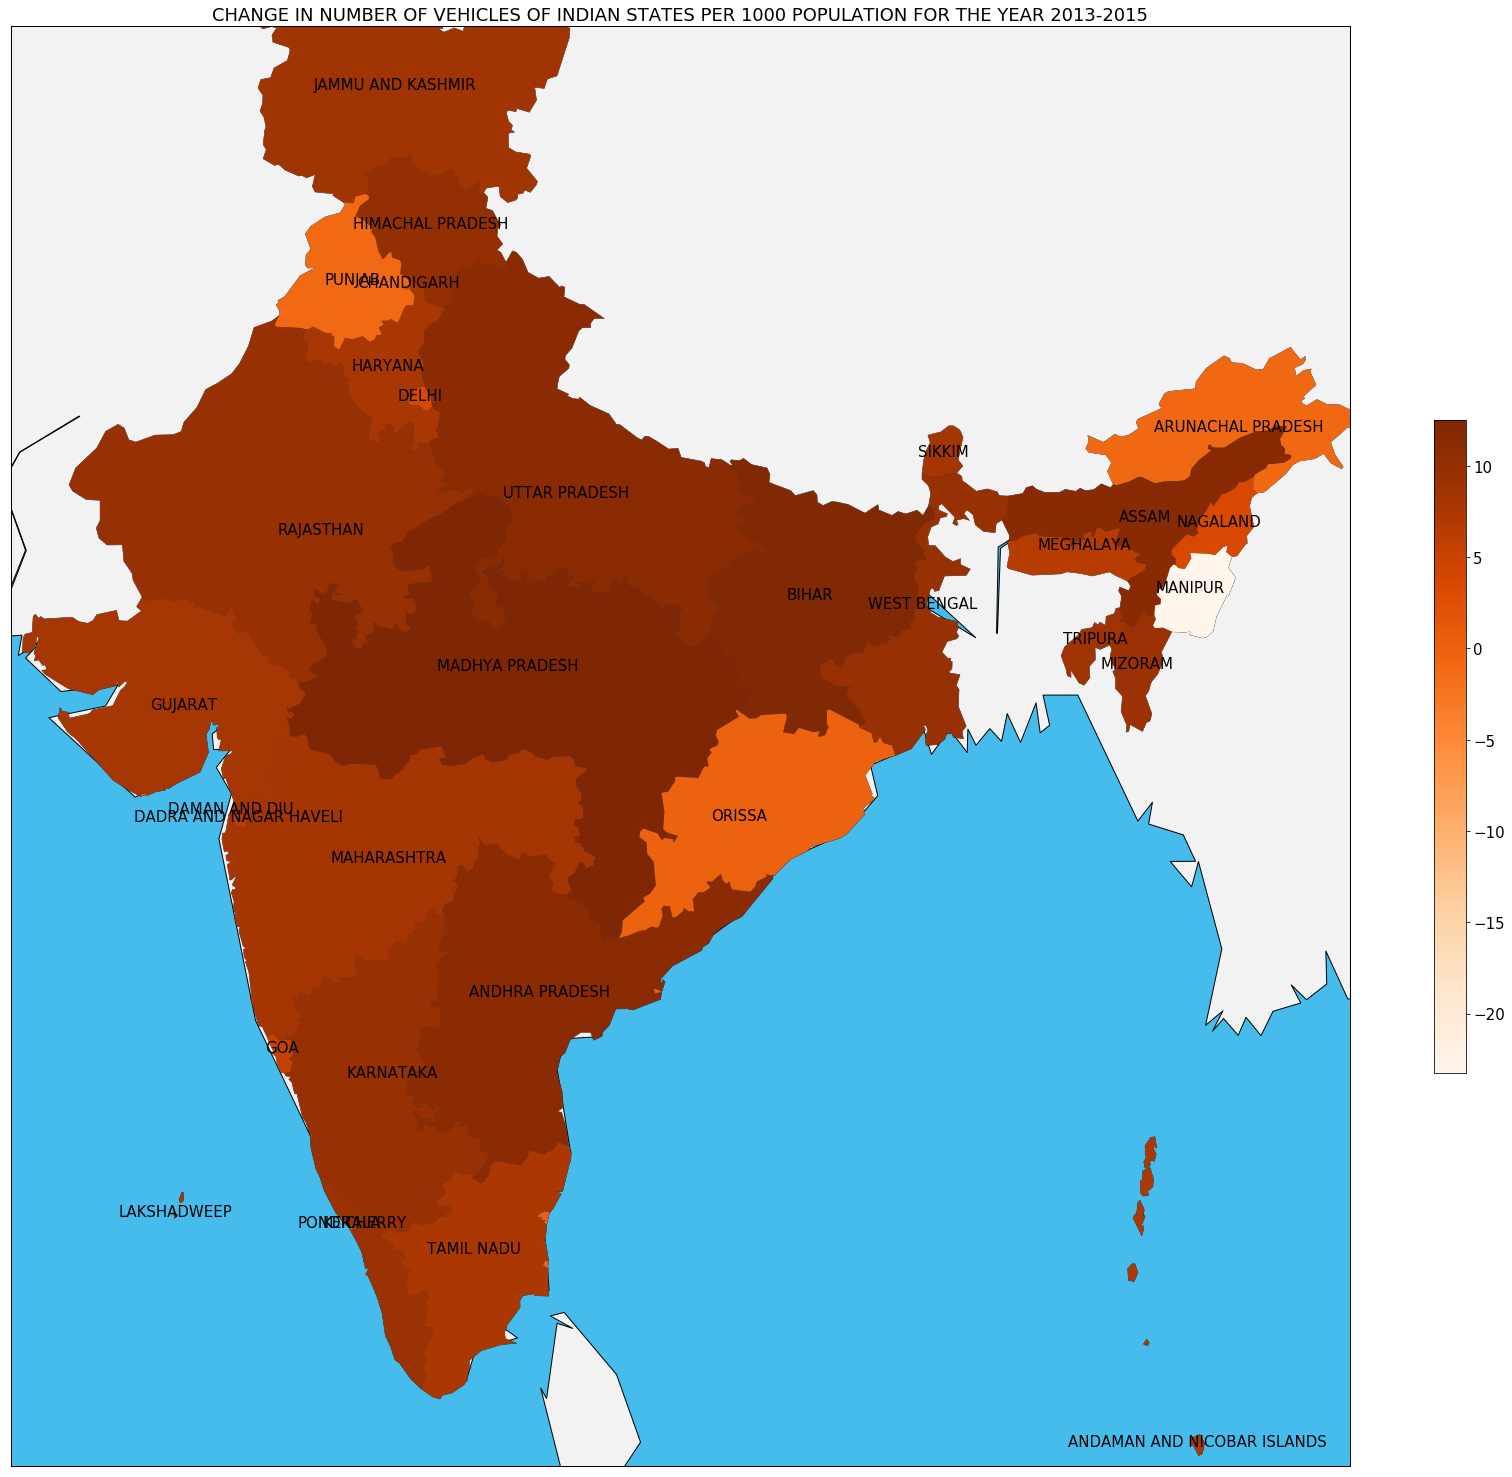

In [68]:
'''
STEP 2 : CREATING A MAP
'''
# Create figure 
fig, ax = plt.subplots()
# Create a map with the coordinates determined by the Bounding Box tool
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')
# Fill continents and lakes
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# Draw coast lines
m.drawcoastlines()

'''
STEP 3 : USING SHAPEFILES FOR DRAWING STATES 
'''
# Load the shape file of India
m.readshapefile(
    "C:\\Data_Science\\Data_science\\Data Viz\\Project\\Uber Data\\Rider\\India Shapefile With Kashmir\\India Shape files\\India Shape\\india_st","INDIA")


'''
STEP 4 : CREATING A DATAFRAME MAPPING SHAPES TO STATE NAME AND CHANGE IN NUMBER OF VEHICLES
'''
# Create an empty list to hold change in number of vehicles in 2014-15
change_of_vehicles_1315 = []

for state_info in m.INDIA_info:
    # Get the state in uppercase, as our csv file has state names in upper case
    state = state_info['STATE'].upper()
    # initialize number of vehicles = 0
    num = 0
    
    # In vehicle_1314 (containing tuples of state name and change in no. of vehicles), search for state 'state'
    # Append its corresponding number to change_of_vehicles_1315
    for x in change_1315:

        if x[0].upper() == state:
            num = x[1]
            break
    change_of_vehicles_1315.append(num) 
    
# Create a dataframe containing shapes, state names and change in no. of vehicles   
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
        'area': [area['STATE'] for area in m.INDIA_info],
        'change_of_vehicles_1315' : change_of_vehicles_1315
    })

'''
STEP 5 : USING DATA TO COLOR AREAS
'''
# Get all the shapes
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
# Create a colormap
cmap = plt.get_cmap('Oranges')   
# Create a patch collection. Create patches on the top of the map, not beneath it (zorder=2)
pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
# Set color according to the change in number of vehicle of the state
pc.set_facecolor(cmap(norm(df_poly['change_of_vehicles_1315'].fillna(0).values)))
ax.add_collection(pc)

printed_names = []
for shapedict,state in zip(m.INDIA_info, m.INDIA):
    state_name = [value for key, value in shapedict.items()][0]
    
    if state_name in printed_names: continue
    # center of polygon
    x, y = np.array(state).mean(axis=0)
    # You have to align x,y manually to avoid overlapping for little states
    plt.text(x+.1, y, state_name, ha="center")
    printed_names += [state_name,] 


# Create a mapper to map color intensities to values
mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(change_of_vehicles_1315)
plt.colorbar(mapper, shrink=0.4)
# Set title for the plot
ax.set_title("CHANGE IN NUMBER OF VEHICLES OF INDIAN STATES PER 1000 POPULATION FOR THE YEAR 2013-2015")
# Change plot size and font size
plt.rcParams['figure.figsize'] = (30, 30)
plt.rcParams.update({'font.size': 20})
plt.show()

### <font color=green> Increasing Trend </font>

We can see from the above plot that in <font color=green> ** Bihar, MadhyaPradesh and parts of Assam ** </font>, the registrations of the number of Motor Vehicles per 1000 population **have increased** from 2013 - 2015.



### <font color=blue> Remained same </font>

Motor vehicles registrations per 1000 population have **almost remained** same during the year 2013- 2015 for <font color=blue> ** Punjab, Orissa and Arunachal Pradesh ** </font>.

***

### <font color=red> Decreasing Trend </font>

However, we can see in <font color=red> **Manipur** </font>, Motor vehicles registrations have **decreased** in 2015 as compared to 2014.